In [1]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_stata("https://www.chesdata.eu/s/CHES2019V3.dta")

print(df.columns.tolist())


['country', 'eastwest', 'party', 'party_id', 'eu_position', 'eu_position_sd', 'eu_salience', 'eu_dissent', 'eu_blur', 'eu_cohesion', 'eu_foreign', 'eu_intmark', 'eu_budgets', 'eu_asylum', 'lrgen', 'lrecon', 'lrecon_sd', 'lrecon_salience', 'lrecon_dissent', 'lrecon_blur', 'galtan', 'galtan_sd', 'galtan_salience', 'galtan_dissent', 'galtan_blur', 'immigrate_policy', 'immigrate_salience', 'immigrate_dissent', 'multiculturalism', 'multicult_salience', 'multicult_dissent', 'redistribution', 'redist_salience', 'environment', 'enviro_salience', 'spendvtax', 'deregulation', 'econ_interven', 'civlib_laworder', 'sociallifestyle', 'religious_principles', 'ethnic_minorities', 'nationalism', 'urban_rural', 'protectionism', 'regions', 'russian_interference', 'anti_islam_rhetoric', 'people_vs_elite', 'antielite_salience', 'corrupt_salience', 'members_vs_leadership', 'eu_econ_require', 'eu_political_require', 'eu_googov_require']


In [5]:
# Quick overview
print("Shape:", df.shape)
#print(df.head())
print(df.head()[:5])
# Summary statistics
#print(df.describe(include='all'))

# Check missing values
# print("\nMissing values:")
# print(df.isnull().sum().sort_values(ascending=False))

# find valid columns
valid_columns = df.columns[df.isnull().sum() < 5].tolist()
print(f"{len(valid_columns)} columns selected out of {len(df.columns)}")

# drop nan data
df_clean = df[valid_columns].dropna()
df_clean

Shape: (277, 55)
  country  eastwest   party  party_id  eu_position  eu_position_sd  \
0      be       1.0      PS     102.0     6.083333        0.288675   
1      be       1.0  SP/SPA     103.0     6.000000        0.426401   
2      be       1.0   ECOLO     104.0     6.583333        0.514929   
3      be       1.0  AGALEV     105.0     6.583333        0.514929   
4      be       1.0  PRL/MR     106.0     6.500000        0.674200   

   eu_salience  eu_dissent   eu_blur  eu_cohesion  ...   regions  \
0     4.272727        2.75  2.166667        6.250  ...  6.000000   
1     4.181818        2.50  1.714286        6.000  ...  5.333333   
2     4.818182        2.50  1.428571        6.000  ...  6.166667   
3     4.818182        2.50  1.285714        5.875  ...  6.083333   
4     5.090909        2.00  1.714286        5.500  ...  6.416667   

   russian_interference  anti_islam_rhetoric  people_vs_elite  \
0              0.111111             2.111111         3.363636   
1              0.111111

,country,party,party_id,eu_position,eu_position_sd,eu_salience,eu_dissent,eu_blur,lrgen,lrecon,...,ethnic_minorities,nationalism,urban_rural,protectionism,regions,russian_interference,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership
0,be,PS,102.0,6.083333,0.288675,4.272727,2.750000,2.166667,2.083333,2.250000,...,2.636364,3.454545,3.333333,6.272727,6.000000,0.111111,3.363636,2.181818,1.909091,7.500000
1,be,SP/SPA,103.0,6.000000,0.426401,4.181818,2.500000,1.714286,3.083333,3.083333,...,2.454545,3.083333,3.000000,5.727273,5.333333,0.111111,3.545455,2.090909,1.636364,6.818182
2,be,ECOLO,104.0,6.583333,0.514929,4.818182,2.500000,1.428571,2.083333,2.500000,...,2.000000,1.750000,1.800000,5.818182,6.166667,0.111111,5.636364,2.454545,2.363636,3.909091
3,be,AGALEV,105.0,6.583333,0.514929,4.818182,2.500000,1.285714,2.416667,2.666667,...,2.000000,1.916667,1.900000,5.909091,6.083333,0.111111,5.636364,2.363636,2.000000,4.000000
4,be,PRL/MR,106.0,6.500000,0.674200,5.090909,2.000000,1.714286,6.500000,6.916667,...,4.454545,3.333333,4.444445,2.727273,6.416667,0.111111,4.636364,1.727273,1.636364,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,ice,M,4504.0,1.200000,0.447214,5.600000,2.000000,0.500000,6.200000,6.200000,...,5.000000,8.600000,9.000000,8.000000,4.000000,0.800000,3.200000,4.400000,1.500000,9.400000
273,ice,Sam,4505.0,6.400000,0.547723,6.800000,2.333333,4.000000,3.200000,3.200000,...,2.000000,1.800000,2.000000,2.000000,6.000000,0.000000,5.000000,1.400000,5.800000,6.400000
274,ice,Pi,4506.0,4.800000,0.447214,4.600000,3.333333,4.500000,4.000000,4.200000,...,1.333333,1.200000,1.400000,1.600000,6.000000,0.000000,5.800000,6.200000,8.400000,2.800000
275,ice,V,4507.0,6.600000,0.547723,8.000000,2.000000,2.500000,6.800000,6.600000,...,2.000000,1.200000,1.000000,0.600000,6.000000,0.000000,3.600000,0.200000,4.600000,7.400000


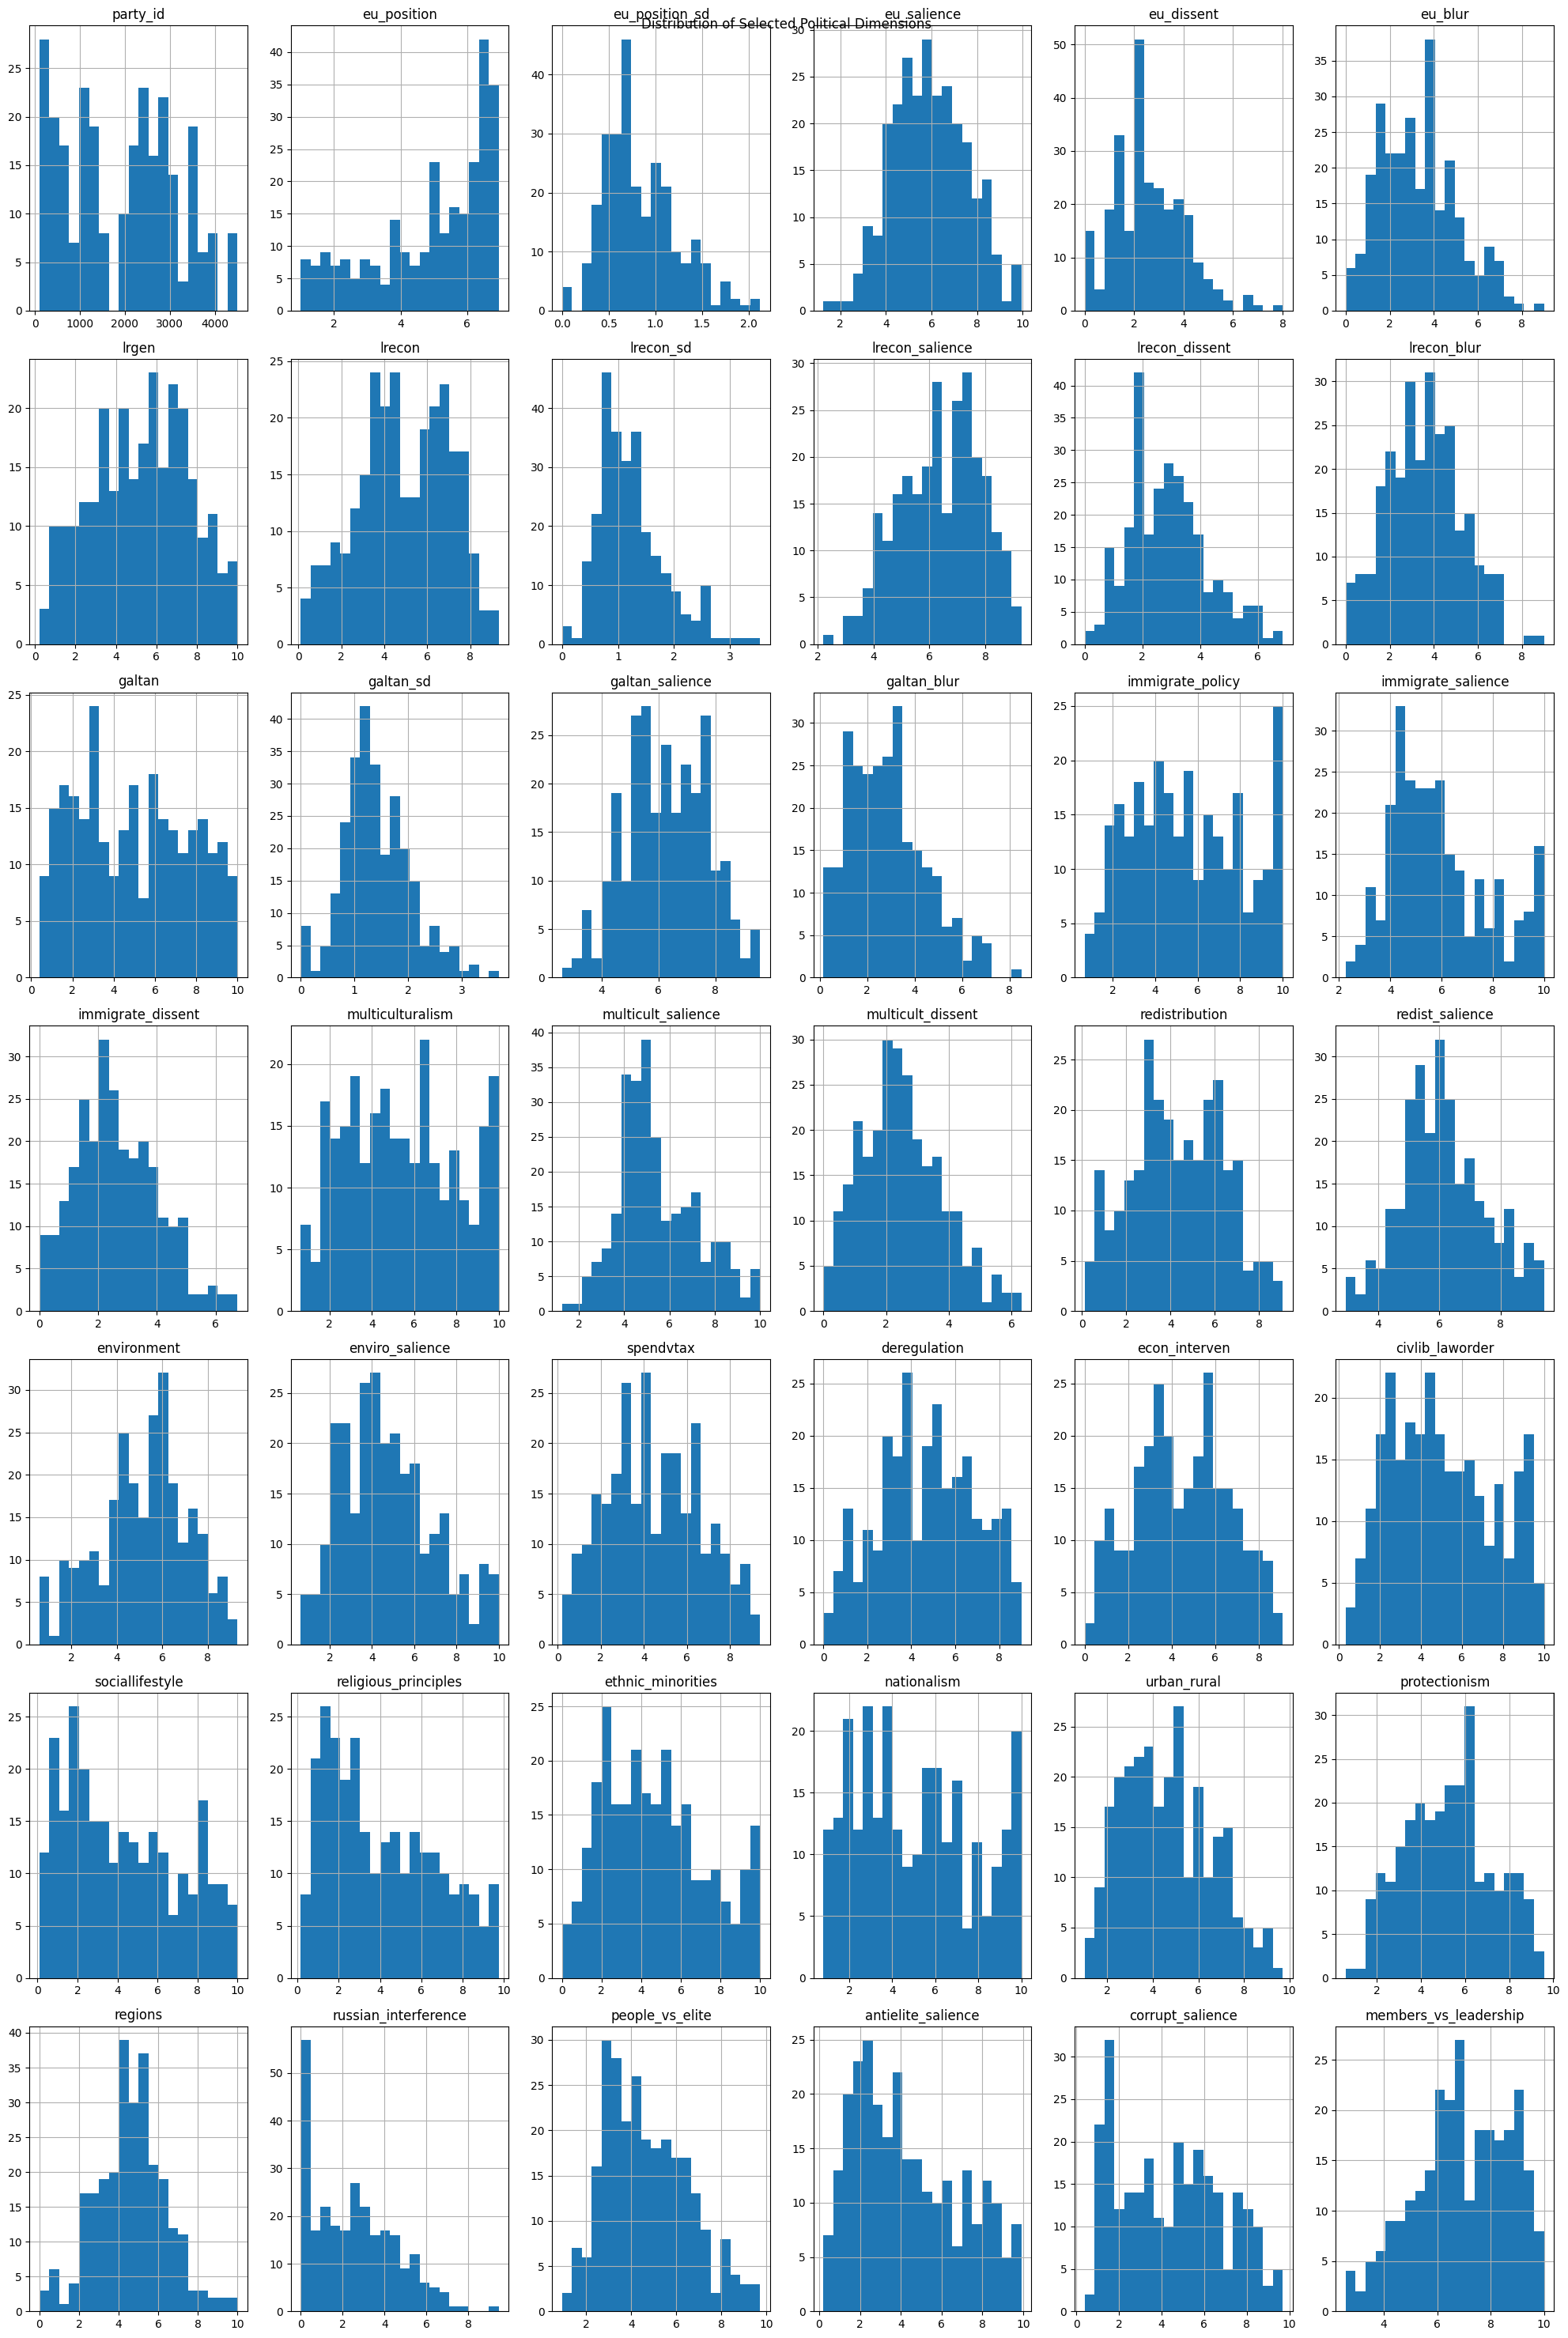

In [48]:
# plotting distributions + correlations on data

# plotting distributions
df_clean.hist(bins=20, figsize=(20, 30))
plt.suptitle("Distribution of Selected Political Dimensions")
plt.tight_layout()
plt.show()


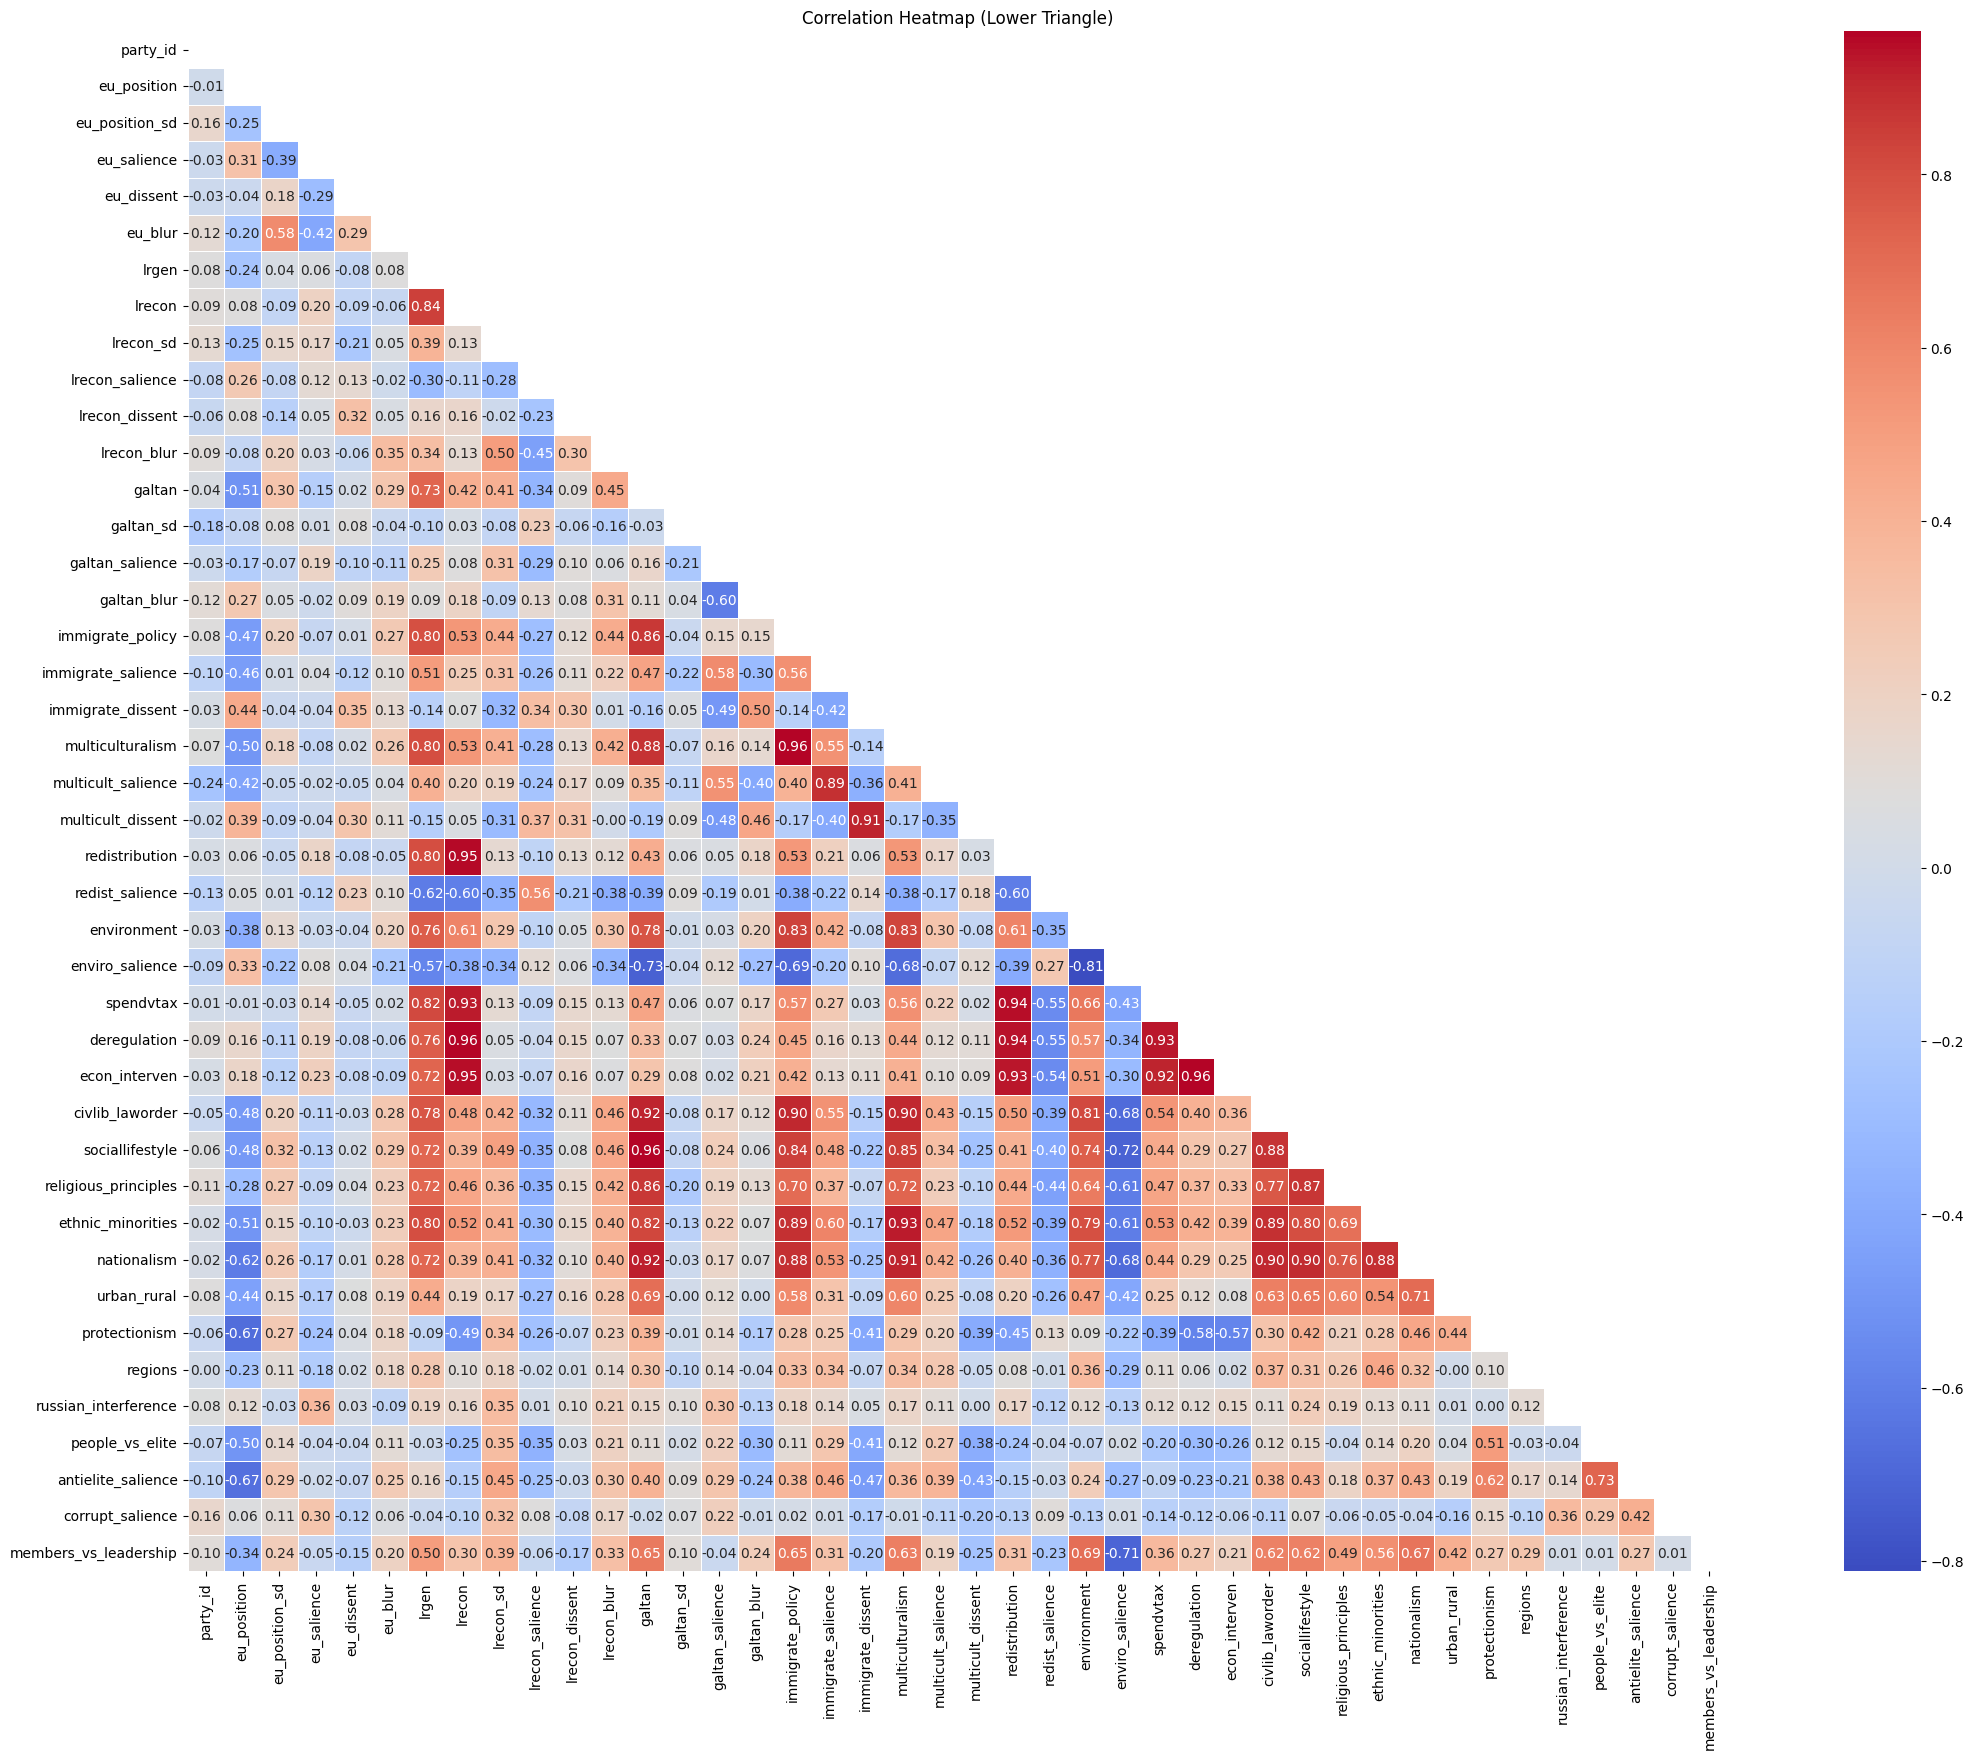


🔍 Pairs of features with correlation > 0.7:
              feature_1           feature_2  correlation
187    multiculturalism    immigrate_policy     0.964764
405       econ_interven        deregulation     0.961970
447     sociallifestyle              galtan     0.961624
358        deregulation              lrecon     0.959640
238      redistribution              lrecon     0.952717
385       econ_interven              lrecon     0.946632
347           spendvtax      redistribution     0.944179
373        deregulation      redistribution     0.941376
400       econ_interven      redistribution     0.934631
377        deregulation           spendvtax     0.930285
332           spendvtax              lrecon     0.929266
404       econ_interven           spendvtax     0.915432
418     civlib_laworder              galtan     0.915258
228   multicult_dissent   immigrate_dissent     0.909975
425     civlib_laworder    multiculturalism     0.904217
422     civlib_laworder    immigrate_policy

In [59]:
# finding and plotting correlations
# select numerical columns
numeric_df = df_clean.select_dtypes(include=["number"])

import numpy as np

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap (only lower triangle)
plt.figure(figsize=(30, 20))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    fmt=".2f"
)
plt.title("Correlation Heatmap (Lower Triangle)")
plt.show()

# Extract strong correlations (> 0.6), excluding diagonal and duplicates
threshold = 0.7
strong_corrs = (
    corr_matrix.where(~mask)
    .stack()
    .reset_index()
    .rename(columns={0: "correlation", "level_0": "feature_1", "level_1": "feature_2"})
)

strong_corrs_filtered = strong_corrs[strong_corrs["correlation"].abs() > threshold]
print("\n🔍 Pairs of features with correlation > 0.7:")
print(strong_corrs_filtered[:40].sort_values(by="correlation", ascending=False))

In [72]:
# Select features according to highest correlation 
final_features = [
    "galtan",           
    "lrecon",        
    "immigrate_policy",
    "redistribution",
    "multiculturalism",
    "immigrate_dissent",
    "environment",
    "spendvtax",
    "spendvtax",
    "sociallifestyle"
]

X = df_clean[final_features].dropna()

# Normalization of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
reduced_dim_data = pca.fit_transform(X_scaled)

In [73]:
X_scaled

array([[-0.7672754 , -1.2715901 , -0.8034594 , ..., -1.1554092 ,
        -1.1554092 , -0.8283266 ],
       [-0.829063  , -0.8731539 , -0.5451552 , ..., -0.84818023,
        -0.84818023, -0.860806  ],
       [-1.4469385 , -1.1520593 , -1.352356  , ..., -1.078602  ,
        -1.078602  , -1.1855997 ],
       ...,
       [-1.7002676 , -0.33924943, -1.7398123 , ..., -0.60239714,
        -0.60239714, -1.3999636 ],
       [-1.4036872 ,  0.8082469 , -1.0423908 , ...,  0.22712077,
         0.22712077, -1.3999636 ],
       [ 0.07921396, -0.43487403,  0.66241693, ..., -1.1554092 ,
        -1.1554092 , -0.32814425]], dtype=float32)

In [74]:
from sklearn.mixture import GaussianMixture
import numpy as np

# reduced_dim_data with PCA
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(reduced_dim_data)

# Predict cluster labels
cluster_labels = gmm.predict(reduced_dim_data)

# Probability scores (soft assignment)
proba = gmm.predict_proba(reduced_dim_data)

df_plot = df_clean.loc[X.index].copy()
df_plot["cluster"] = cluster_labels

# check each feature by means
cluster_summary = df_plot.groupby("cluster")[final_features].mean().round(2)
print("\n🔍 Cluster Feature Means:")
print(cluster_summary[:])


🔍 Cluster Feature Means:
         galtan  lrecon  immigrate_policy  redistribution  multiculturalism  \
cluster                                                                       
0          2.38    2.80              2.97            2.28              2.94   
1          5.45    5.94              5.89            5.32              5.81   
2          8.92    5.88              9.47            5.25              9.35   

         immigrate_dissent  environment  spendvtax  spendvtax  sociallifestyle  
cluster                                                                         
0                     2.65         3.06       2.26       2.26             1.69  
1                     3.17         5.74       5.57       5.57             4.71  
2                     0.86         7.57       5.66       5.66             8.56  


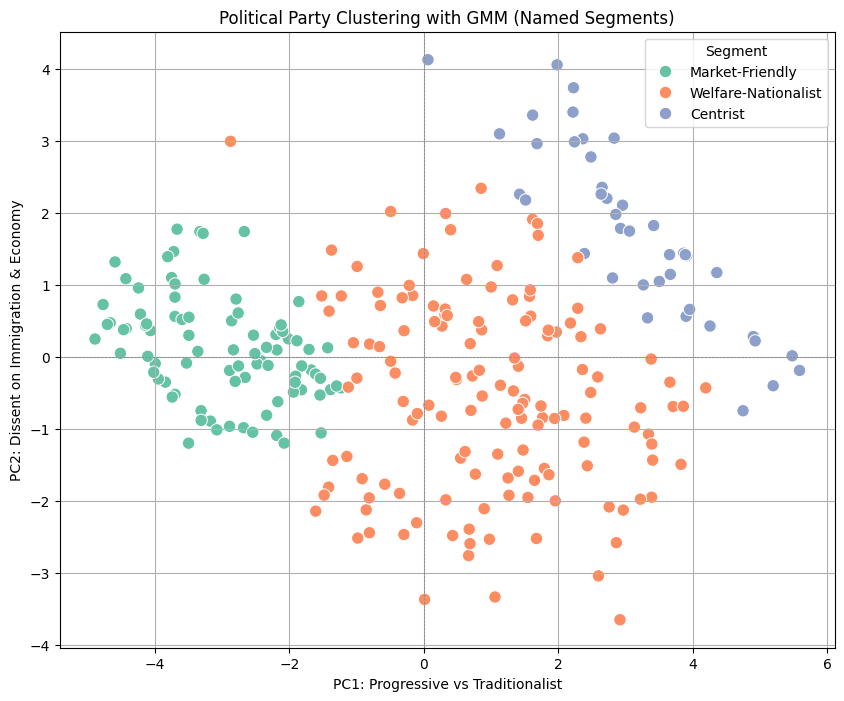

In [75]:
cluster_labels_named = {
    0: "Market-Friendly",
    1: "Welfare-Nationalist",
    2: "Centrist"
}

# adding labels
df_plot["cluster_label"] = df_plot["cluster"].map(cluster_labels_named)

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=reduced_dim_data[:, 0],
    y=reduced_dim_data[:, 1],
    hue=df_plot["cluster_label"],
    palette="Set2",
    s=80
)

plt.xlabel("PC1: Progressive vs Traditionalist")
plt.ylabel("PC2: Dissent on Immigration & Economy")
plt.title("Political Party Clustering with GMM (Named Segments)")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.legend(title="Segment")
plt.show()
